In [ ]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import arcpy

cm = 1/2.54  # centimeters in inches

%matplotlib inline

In [8]:
from trf import surface, shader

phi = 1.618
x=1900
y=1500
swatchHeight = 400
swatchWidth = int(swatchHeight * phi) #GoldenRatio

In [9]:
dem = arcpy.RasterToNumPyArray("./Crater_Lake.tif")
nlcd = arcpy.RasterToNumPyArray("./NLCD.tif")

dem = dem[y-swatchHeight:y+swatchHeight, x-swatchWidth:x+swatchWidth]
nlcd = nlcd[y-swatchHeight:y+swatchHeight, x-swatchWidth:x+swatchWidth]


In [10]:
snv = surface.normals_by_method(dem, 3.33, "N82")
bm = np.asarray(Image.open(r"../BumpMaps/Waves_NS.tiff"))

bumpmap = surface.bump_extent_by_mask(nlcd==11, bm)

In [11]:
B = surface.applyBumpMap(snv, bumpmap)
hs = shader.lambert(B, np.array([-0.5, 0.5, 0.707]))

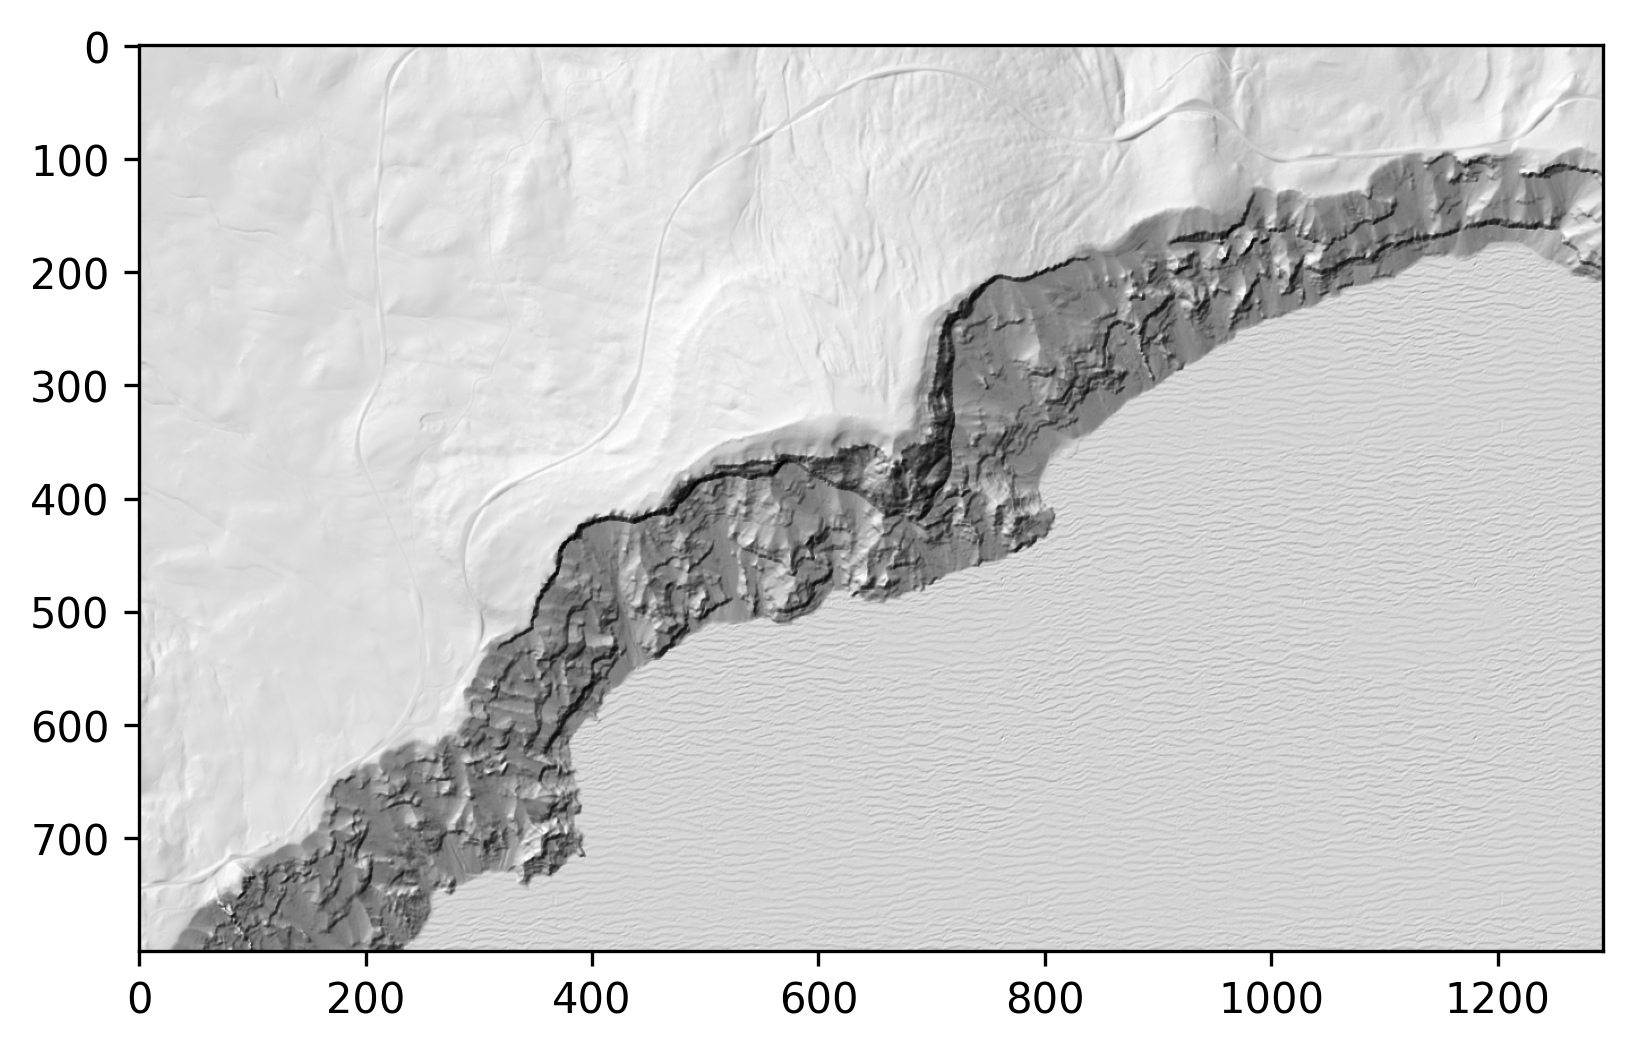

In [12]:
plt.figure(figsize=(16*cm,16*cm), dpi=300)
plt.imshow((hs+1)/2, cmap='gray')

In [13]:
from ipywidgets import IntProgress, HTML, VBox
from IPython.display import display
from trf import shader, utils

progressMsg = HTML()
progressBar = IntProgress(min=0, max=18)
vbox=VBox(children=[progressBar, progressMsg])
display(vbox)

In [14]:
accumulator = np.zeros(dem.shape)
for azimuth in range(0, 18):
    progressBar.value = azimuth
    az = 270 + (azimuth*10)
    progressMsg.value = f"Light {progressBar.value} of {progressBar.max} : Az={az} / El=40"
    shadeArray = shader.lambert(snv, utils.lightVector(float(az), 40))

progressBar.bar_style='success'